**This notebook is an exercise in the [Intro to Deep Learning](https://www.kaggle.com/learn/intro-to-deep-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/ryanholbrook/binary-classification).**

---


# Introduction #

В этом упражнении вы построите модель для прогнозирования отмены бронирования отеля с помощью бинарного классификатора.

In [1]:
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

# Setup feedback system
from learntools.core import binder
binder.bind(globals())
from learntools.deep_learning_intro.ex6 import *

/tmp/ipykernel_34/3338970720.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


First, load the *Hotel Cancellations* dataset.

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

hotel = pd.read_csv('../input/dl-course-data/hotel.csv')

X = hotel.copy()
y = X.pop('is_canceled')

X['arrival_date_month'] = \
    X['arrival_date_month'].map(
        {'January':1, 'February': 2, 'March':3,
         'April':4, 'May':5, 'June':6, 'July':7,
         'August':8, 'September':9, 'October':10,
         'November':11, 'December':12}
    )

features_num = [
    "lead_time", "arrival_date_week_number",
    "arrival_date_day_of_month", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "is_repeated_guest", "previous_cancellations",
    "previous_bookings_not_canceled", "required_car_parking_spaces",
    "total_of_special_requests", "adr",
]
features_cat = [
    "hotel", "arrival_date_month", "meal",
    "market_segment", "distribution_channel",
    "reserved_room_type", "deposit_type", "customer_type",
]

transformer_num = make_pipeline(
    SimpleImputer(strategy="constant"), # there are a few missing values
    StandardScaler(),
)
transformer_cat = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="NA"),
    OneHotEncoder(handle_unknown='ignore'),
)

preprocessor = make_column_transformer(
    (transformer_num, features_num),
    (transformer_cat, features_cat),
)

# stratify - make sure classes are evenlly represented across splits
X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)

input_shape = [X_train.shape[1]]

# 1) Define Model #

Модель, которую мы будем использовать в этот раз, будет содержать как слои пакетной нормализации, так и слои исключения. Для удобства чтения мы разбили диаграмму на блоки, но вы можете определять ее слой за слоем, как обычно.

Определите модель с архитектурой, представленной на этой диаграмме:

<figure style="padding: 1em;">
<img src="https://storage.googleapis.com/kaggle-media/learn/images/V04o59Z.png" width="400" alt="Diagram of network architecture: BatchNorm, Dense, BatchNorm, Dropout, Dense, BatchNorm, Dropout, Dense.">
<figcaption style="textalign: center; font-style: italic"><center>Diagram of a binary classifier.</center></figcaption>
</figure>


In [4]:
from tensorflow import keras
from tensorflow.keras import layers

# YOUR CODE HERE: define the model given in the diagram
model =  keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])
# Check your answer
q_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

# 2) Add Optimizer, Loss, and Metric #

Теперь скомпилируйте модель с помощью оптимизатора Adam и бинарный версий показателя потери перекрестной энтропии и точности.

In [5]:
# YOUR CODE HERE
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

# Check your answer
q_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

Наконец, запустите эту ячейку, чтобы обучить модель и просмотреть кривые обучения. Это может длиться от 60 до 70 периодов, что может занять минуту или две.

Epoch 1/200


I0000 00:00:1740588021.620484      97 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


175/175 [==============================] - 6s 6ms/step - loss: 0.4823 - binary_accuracy: 0.7710 - val_loss: 0.4322 - val_binary_accuracy: 0.8016
Epoch 2/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4241 - binary_accuracy: 0.7998 - val_loss: 0.4028 - val_binary_accuracy: 0.8134
Epoch 3/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4100 - binary_accuracy: 0.8081 - val_loss: 0.3946 - val_binary_accuracy: 0.8168
Epoch 4/200
175/175 [==============================] - 1s 5ms/step - loss: 0.4014 - binary_accuracy: 0.8131 - val_loss: 0.3925 - val_binary_accuracy: 0.8202
Epoch 5/200
175/175 [==============================] - 1s 5ms/step - loss: 0.3963 - binary_accuracy: 0.8149 - val_loss: 0.3855 - val_binary_accuracy: 0.8226
Epoch 6/200
175/175 [==============================] - 1s 5ms/step - loss: 0.3923 - binary_accuracy: 0.8173 - val_loss: 0.3827 - val_binary_accuracy: 0.8241
Epoch 7/200
175/175 [==============================] - 1s 5ms/step - l

<Axes: title={'center': 'Accuracy'}>

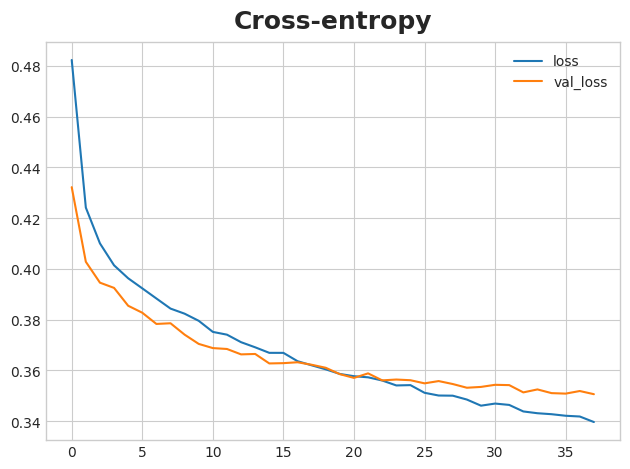

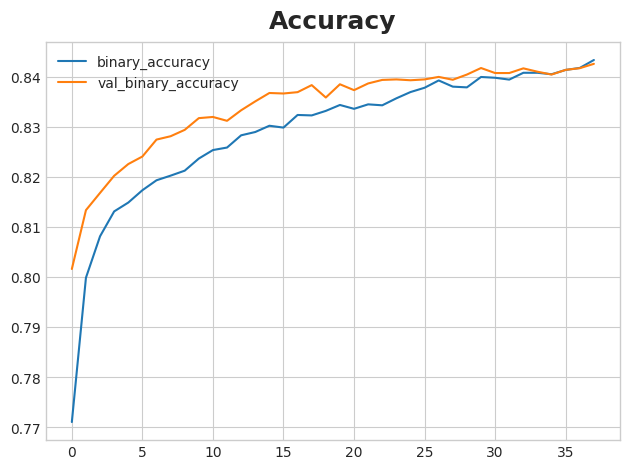

In [6]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

# 3) Train and Evaluate #


Что вы думаете о кривых обучения? Похоже ли, что модель недостаточно или слишком хорошо адаптирована? Была ли потеря перекрестной энтропии хорошей заменой точности?

Хотя мы видим, что потери при обучении продолжают снижаться, ранний обратный вызов предотвратил переобучение. Более того, точность повышалась с той же скоростью, с какой снижалась перекрестная энтропия, так что, похоже, минимизация перекрестной энтропии была хорошей заменой. В целом, похоже, что это обучение прошло успешно!

# Conclusion #

Congratulations! You've completed Kaggle's *Introduction to Deep Learning* course!

With your new skills you're ready to take on more advanced applications like computer vision and sentiment classification. What would you like to do next?

Why not try one of our *Getting Started* competitions?

- Classify images with TPUs in [**Petals to the Metal**](https://www.kaggle.com/c/tpu-getting-started)
- Create art with GANs in [**I'm Something of a Painter Myself**](https://www.kaggle.com/c/gan-getting-started)
- Classify Tweets in [**Real or Not? NLP with Disaster Tweets**](https://www.kaggle.com/c/nlp-getting-started)
- Detect contradiction and entailment in [**Contradictory, My Dear Watson**](https://www.kaggle.com/c/contradictory-my-dear-watson)

Until next time, Kagglers!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/intro-to-deep-learning/discussion) to chat with other learners.*